In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [3]:
# 读取数据
train_data_file = './data/zhengqi_train.txt'
test_data_file = './data/zhengqi_test.txt'
train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

In [4]:
# 归一化
from sklearn import preprocessing
feature_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[feature_columns])
train_data_scaler = min_max_scaler.transform(train_data[feature_columns])
test_data_scaler = min_max_scaler.transform(test_data[feature_columns])
train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = feature_columns
test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = feature_columns
train_data_scaler['target'] = train_data['target']

In [5]:
# PCA降维
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:, 0:-1])
new_test_pca_16 = pca.fit_transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']

In [6]:
# 切分训练集和测试集
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)

In [7]:
# 欠拟合
clf = SGDRegressor(max_iter=500, tol=1e-2)
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE: ", score_train)
print("SGDRegressor test MST： ", score_test)

SGDRegressor train MSE:  0.15148710084071532
SGDRegressor test MST：  0.15581828727213265


In [8]:
# 过拟合
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE: ", score_train)
print("SGDRegressor test MST： ", score_test)

SGDRegressor train MSE:  0.13275632072986537
SGDRegressor test MST：  0.14537614650974154


In [9]:
# 正常拟合
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE: ", score_train)
print("SGDRegressor test MST： ", score_test)

SGDRegressor train MSE:  0.13418161688088884
SGDRegressor test MST：  0.14242517099734092


In [11]:
# L2正则
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty='L2', alpha=0.0001)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE: ", score_train)
print("SGDRegressor test MST： ", score_test)

SGDRegressor train MSE:  0.1342615879149968
SGDRegressor test MST：  0.14272699030850525


In [13]:
# L1正则
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty='L1', alpha=0.0001)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE: ", score_train)
print("SGDRegressor test MST： ", score_test)

SGDRegressor train MSE:  0.134753787835428
SGDRegressor test MST：  0.1427830066625351


In [14]:
# ElasticNet 加权正则化
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty='elasticnet', l1_ratio=0.9, alpha=0.00001)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE: ", score_train)
print("SGDRegressor test MST： ", score_test)

SGDRegressor train MSE:  0.1341116590531759
SGDRegressor test MST：  0.14248998861403644


In [15]:
# 简单交叉验证
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)

clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE: ", score_train)
print("SGDRegressor test MST： ", score_test)

SGDRegressor train MSE:  0.14166989951192457
SGDRegressor test MST：  0.14703669003280073


In [16]:
# K折交叉验证
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    train_data, test_data, train_target, test_target = train.values[train_index], train.values[test_index], \
                                                       target[train_index], target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, "折 ", "SGDRegressor train MSE: ", score_train)
    print(k, "折 ", "SGDRegressor test MST： ", score_test)

0 折  SGDRegressor train MSE:  0.1500009080783644
0 折  SGDRegressor test MST：  0.10626561493070527
1 折  SGDRegressor train MSE:  0.13352641514909203
1 折  SGDRegressor test MST：  0.1820902055198
2 折  SGDRegressor train MSE:  0.14699914324102833
2 折  SGDRegressor test MST：  0.1332399093002056
3 折  SGDRegressor train MSE:  0.14065908363829804
3 折  SGDRegressor test MST：  0.162588591011049
4 折  SGDRegressor train MSE:  0.13862025106428347
4 折  SGDRegressor test MST：  0.16587705988212795


In [17]:
# 留一验证
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
num = 100
for k, (train_index, test_index) in enumerate(loo.split(train)):
    train_data, test_data, train_target, test_target = train.values[train_index], train.values[test_index], \
                                                       target[train_index], target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, "个 ", "SGDRegressor train MSE: ", score_train)
    print(k, "个 ", "SGDRegressor test MST： ", score_test)
    if k >= 9:
        break

0 个  SGDRegressor train MSE:  0.14166618127704297
0 个  SGDRegressor test MST：  0.013443175909067956
1 个  SGDRegressor train MSE:  0.14099558780815136
1 个  SGDRegressor test MST：  0.11688455823821182
2 个  SGDRegressor train MSE:  0.14164531109227244
2 个  SGDRegressor test MST：  0.03747917276583891
3 个  SGDRegressor train MSE:  0.14096730177926559
3 个  SGDRegressor test MST：  0.004528201785638512
4 个  SGDRegressor train MSE:  0.1416284146343981
4 个  SGDRegressor test MST：  0.011925097899128283
5 个  SGDRegressor train MSE:  0.14169671565961917
5 个  SGDRegressor test MST：  0.13449880689750104
6 个  SGDRegressor train MSE:  0.14098137337629535
6 个  SGDRegressor test MST：  0.027047387518022104
7 个  SGDRegressor train MSE:  0.14169386852215207
7 个  SGDRegressor test MST：  0.0007341696567259614
8 个  SGDRegressor train MSE:  0.14153355434932796
8 个  SGDRegressor test MST：  0.08955569148609488
9 个  SGDRegressor train MSE:  0.14160059955152984
9 个  SGDRegressor test MST：  0.04996232568230887


In [18]:
# 留P法交叉验证
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=10)
num = 100
for k, (train_index, test_index) in enumerate(loo.split(train)):
    train_data, test_data, train_target, test_target = train.values[train_index], train.values[test_index], \
                                                       target[train_index], target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, "10个 ", "SGDRegressor train MSE: ", score_train)
    print(k, "10个 ", "SGDRegressor test MST： ", score_test)
    if k >= 9:
        break

0 10个  SGDRegressor train MSE:  0.14172637178885894
0 10个  SGDRegressor test MST：  0.013031416148561925
1 10个  SGDRegressor train MSE:  0.14157259429661342
1 10个  SGDRegressor test MST：  0.12179894091204545
2 10个  SGDRegressor train MSE:  0.14096583953392688
2 10个  SGDRegressor test MST：  0.03403657536542971
3 10个  SGDRegressor train MSE:  0.1416943343970172
3 10个  SGDRegressor test MST：  0.003410005620854972
4 10个  SGDRegressor train MSE:  0.141543841642905
4 10个  SGDRegressor test MST：  0.011559256989265826
5 10个  SGDRegressor train MSE:  0.14159468928974603
5 10个  SGDRegressor test MST：  0.13689697654164884
6 10个  SGDRegressor train MSE:  0.14160509970650723
6 10个  SGDRegressor test MST：  0.02469814750838549
7 10个  SGDRegressor train MSE:  0.1416367200282883
7 10个  SGDRegressor test MST：  0.00040278957965148227
8 10个  SGDRegressor train MSE:  0.14099502270246578
8 10个  SGDRegressor test MST：  0.08098342114452384
9 10个  SGDRegressor train MSE:  0.14167369103779578
9 10个  SGDRegressor

In [19]:
# 网格搜索
train_data2 = pd.read_csv("./data/zhengqi_train.txt", sep='\t')
test_data2 = pd.read_csv("./data/zhengqi_test.txt", sep='\t')

train_data2_f = train_data2[test_data2.columns].values
train_data2_target = train_data2['target'].values

# LGB 模型
from sklearn.model_selection import KFold
import lightgbm as lgb
import numpy as np

# 5折交叉验证
Folds = 5
kf = KFold(n_splits=Folds, shuffle=True, random_state=2019)
# 记录训练和预测MSE
MSE_dict = {'train_mse':[], 'test_mse':[]}

# 线下训练预测
for i, (train_index, test_index) in enumerate(kf.split(train_data2_f)):
    lgb_reg = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=5000,
        boosting_type='gbdt',
        random_state=2019,
        objective='regression'
    )
    X_train_KFold, X_test_KFold = train_data2_f[train_index], train_data2_f[test_index]
    y_train_KFold, y_test_KFold = train_data2_target[train_index], train_data2_target[test_index]
    # 训练
    lgb_reg.fit(X=X_train_KFold,
                y=y_train_KFold,
                eval_set=[(X_train_KFold, y_train_KFold),
                          (X_test_KFold, y_test_KFold)],
                eval_names=['Train', 'Test'],
                early_stopping_rounds=100,
                eval_metric='MSE',
                verbose=50)

    y_train_KFold_predict = lgb_reg.predict(X_train_KFold, num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(X_test_KFold, num_iteration=lgb_reg.best_iteration_)

    print('第{}折 训练和预测 训练MSE 预测MSE'.format(i+1))
    train_mse = mean_squared_error(y_train_KFold_predict, y_train_KFold)
    print("-----------\n", "训练MSE\n", train_mse, "-----------\n")
    test_mse = mean_squared_error(y_test_KFold_predict, y_test_KFold)
    print("-----------\n", "测试MSE\n", test_mse, "-----------\n")

    MSE_dict['train_mse'].append(train_mse)
    MSE_dict['test_mse'].append(test_mse)
print("-----------\n", "训练MSE\n", MSE_dict['train_mse'], "\n",
      np.mean(MSE_dict['train_mse']), "-----------\n")
print("-----------\n", "测试MSE\n", MSE_dict['test_mse'], "\n",
      np.mean(MSE_dict['test_mse']), "-----------\n")

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.428458	Test's l2: 0.466965
[100]	Train's l2: 0.221807	Test's l2: 0.263431
[150]	Train's l2: 0.135301	Test's l2: 0.183515
[200]	Train's l2: 0.0958737	Test's l2: 0.148825
[250]	Train's l2: 0.075642	Test's l2: 0.133187
[300]	Train's l2: 0.0629311	Test's l2: 0.125237
[350]	Train's l2: 0.054088	Test's l2: 0.121321
[400]	Train's l2: 0.0473551	Test's l2: 0.118307
[450]	Train's l2: 0.0418952	Test's l2: 0.116414
[500]	Train's l2: 0.0375119	Test's l2: 0.114863
[550]	Train's l2: 0.0337062	Test's l2: 0.114002
[600]	Train's l2: 0.0303868	Test's l2: 0.112781
[650]	Train's l2: 0.02756	Test's l2: 0.11207
[700]	Train's l2: 0.0250506	Test's l2: 0.111287
[750]	Train's l2: 0.0228758	Test's l2: 0.110742
[800]	Train's l2: 0.0209081	Test's l2: 0.1103
[850]	Train's l2: 0.0191684	Test's l2: 0.109946
[900]	Train's l2: 0.0176066	Test's l2: 0.109759
[950]	Train's l2: 0.0162243	Test's l2: 0.109423
[1000]	Train's l2: 0.014984	Test's l2

<module 'matplotlib.pyplot' from 'C:\\InstallSoft\\Anaconda\\envs\\MachineLearning\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 2700x1500 with 0 Axes>

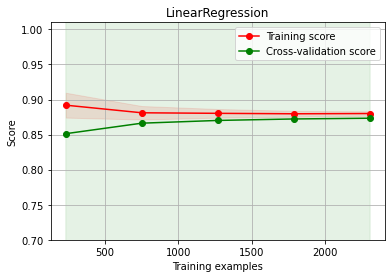

In [20]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve

plt.figure(figsize=(18, 10), dpi=150)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.mean(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes,
                     train_scores_mean-train_scores_std,
                     train_scores_mean+train_scores_std,
                     alpha=0.1,
                     color='r')
    plt.fill_between(train_sizes,
                     test_scores_mean-test_scores_std,
                     test_scores_mean+test_scores_std,
                     alpha=0.1,
                     color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-validation score")

    plt.legend(loc='best')
    return plt

X = train_data2[test_data2.columns].values
y = train_data2['target'].values

title = "LinearRegression"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

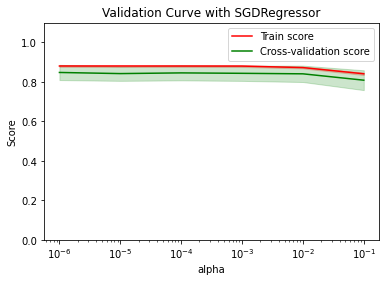

In [21]:
# 绘制验证曲线
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import validation_curve

X = train_data2[test_data2.columns].values
y = train_data2['target'].values

param_range = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
train_scores, test_scores = validation_curve(SGDRegressor(max_iter=10000,
                                                          tol=1e-3,
                                                          penalty='L1'),
                                             X,
                                             y,
                                             param_name='alpha',
                                             param_range=param_range,
                                             cv=10,
                                             scoring='r2',
                                             n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SGDRegressor")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)

plt.semilogx(param_range, train_scores_mean, label="Train score", color='r')
plt.fill_between(param_range,
                 train_scores_mean-train_scores_std,
                 train_scores_mean+train_scores_std,
                 alpha=0.2,
                 color='r')
plt.semilogx(param_range,
             test_scores_mean,
             label="Cross-validation score",
             color="g")
plt.fill_between(param_range,
                 test_scores_mean-test_scores_std,
                 test_scores_mean+test_scores_std,
                 alpha=0.2,
                 color='g')
plt.legend(loc="best")
plt.show()